# IMDb Movie Review using logistic regression
---

In [20]:
# %pip install -r requirements.txt

## Imported Pandas and scikit-learn
**Pandas** for importing csv file and mapping the sentiment to 1 and 0. **Scikit-learn** is the main backbone for this logistic regression, accuracy_score and as well as Countvectorizer. **Matplotlib** for creating visualizations to understand our data and model performance.


---

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Pandas Used
Used pandas to **open csv file** and marking X as the **array of the reviews** given and Y as the 0 or 1 based on if its **positive or negative** respectively.

---

In [22]:
df = pd.read_csv("IMDB Dataset.csv")
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

## Vectorization Used
Used sckilearn's module which tries to **implement the vectorisation of the strings** so its easier for the ML to learn. Here by using **stop_words='english'**, I am trying to remove common words to be added to the vectorization.

---

In [23]:
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

## Training and testing data split
Using **skitlearn's module**, we splited the data in the ratio 3:7 for 30% of data to be used for testing and others for training. Random set is set to **2** so that the code can be repeatable and still not change (like setting a random seed).

---

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.3, random_state=2
)

## Logistic Regression

Using skitlearn's model, we directly used **Logistic regression** model and added **max_iter as 2000** which means how long should try to find **best optimizer**, which iteratively try to find the best coeff. and thus find **min error**. The coeff here is mainly **biases and weights**. 

---

In [34]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


## Precting and accuracy

Using skitlearn's model, we try to **predict using Logistic regression model** and thus try to **accuracy percentage!**

---

In [35]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.886


## Confusion Matrix
This matrix shows how many prediction are **true positives, false positives, true negatives and false negatives** by the logistic reggression model used. Here labels are made such that **1 is positive and 0 is negative**.

---

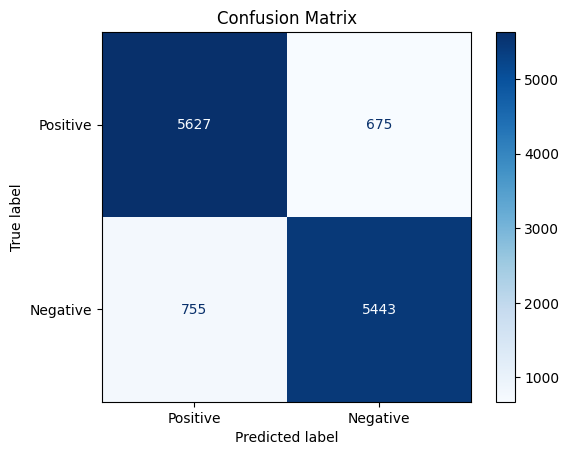

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Sentiment Distribution 
**This is for Visualising the count of positives and negative sentiments.**

---

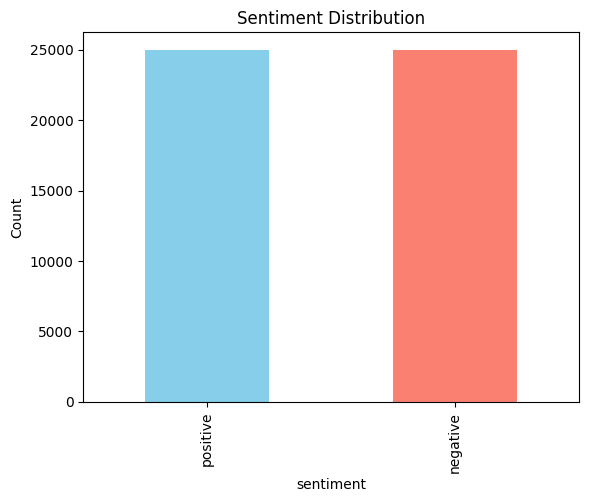

In [28]:
df['sentiment'].value_counts().plot(
    kind='bar',
    color=['skyblue','salmon'],
    title='Sentiment Distribution'
)
plt.ylabel("Count")
plt.show()


## Frequency Distribution 
**This is for visualising the count of frequent words used using matplotlib.**

---

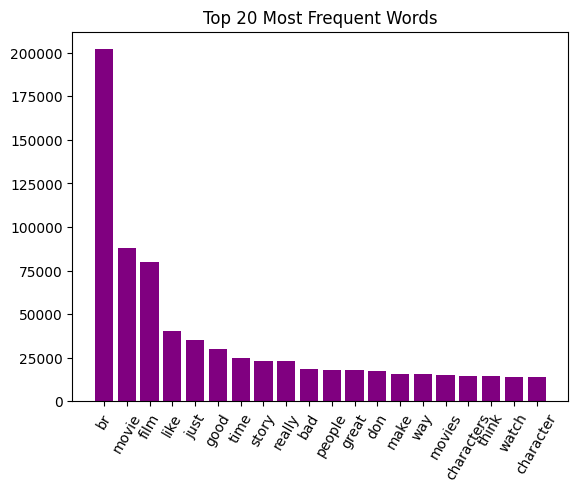

In [29]:
word_counts = X_vec.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
sorted_idx = np.argsort(word_counts)[::-1][:20]

plt.bar(range(20), word_counts[sorted_idx], color="purple")
plt.xticks(range(20), [words[i] for i in sorted_idx], rotation=60)
plt.title("Top 20 Most Frequent Words")
plt.show()
